In [2]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import seaborn as sns

In [3]:
# Load train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
# Filtering out features other than rating features
filtered_train = train[train.columns[8:21]]
filtered_test = test[test.columns[8:21]]

In [7]:
filtered_train[1:5]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
1,3,2,3,3,1,3,1,1,1,5,3,1,4
2,2,2,2,2,5,5,5,5,4,3,4,4,4
3,2,5,5,5,2,2,2,2,2,5,3,1,4
4,3,3,3,3,4,5,5,3,3,4,4,3,3


In [8]:
#check number of dimensions of test and train datasets
print(filtered_train.shape)
print(filtered_test.shape)

(103904, 13)
(25976, 13)


In [19]:
# Fit and transform EFA on train data set
efa = FactorAnalysis(n_components=3, random_state=0)
filtered_train_efa = efa.fit(filtered_train)

In [21]:
#print(filtered_train_efa.components_)
df = pd.DataFrame(filtered_train_efa.components_.T, index=filtered_train.columns, columns=['Factor1', 'Factor2', 'Factor3'])
df

,Factor1,Factor2,Factor3
Inflight wifi service,-0.986934,0.349598,0.021366
Departure/Arrival time convenient,-0.600355,0.394448,-0.123652
Ease of Online booking,-1.098992,0.712383,-0.005985
Gate location,-0.487074,0.386288,-0.006124
Food and drink,-0.459062,-0.627094,0.686846
Online boarding,-0.714322,-0.045327,0.242004
Seat comfort,-0.482956,-0.645300,0.600262
Inflight entertainment,-0.696703,-0.952546,0.223363
On-board service,-0.426483,-0.559507,-0.566329
Leg room service,-0.390836,-0.339461,-0.393837


<AxesSubplot:>

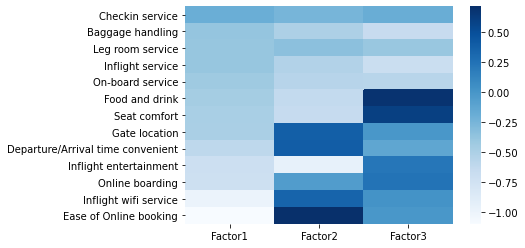

In [22]:
sns.heatmap(df.sort_values('Factor1', axis=0, ascending=False, inplace=False), cmap="Blues")

<AxesSubplot:>

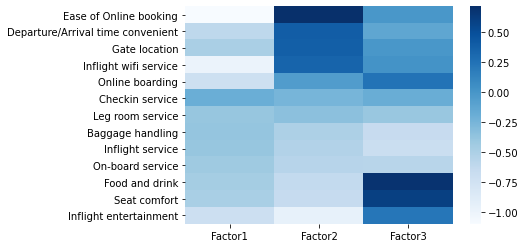

In [23]:
sns.heatmap(df.sort_values('Factor2', axis=0, ascending=False, inplace=False), cmap="Blues")

<AxesSubplot:>

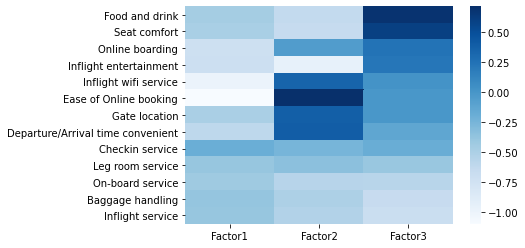

In [24]:
sns.heatmap(df.sort_values('Factor3', axis=0, ascending=False, inplace=False), cmap="Blues")